# 워드 클라우드 개인과제

In [11]:
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

font = "NanumPen"
font_path = "%s.ttf" % font

icon = "usa" 
icon_path = "%s.png" % icon

### 데이터 입력

In [13]:
#오바마 연설문

f = open("BarackObama's_Inaugural_Address.txt", 'r', encoding='euc-kr')
message_of_obama = f.read()
print(message_of_obama)
f.close()

나는 오늘 여러분이 준 신뢰에 감사하며 선조의 희생을 되새기며 우리의 과제 앞에 겸허히 섰습니다. 나는 우선 부시 대통령이 정권 인수에 협력을 아끼지 않았고 그동안 국가를 위해 헌신하신 데 대해 경의를 표합니다. 우리는 지금 위기에 처해 있다는 사실을 잘 알고 있습니다. 우리는 지금 저 멀리 증오와 폭력의 조직과 전쟁 중입니다. 우리의 경제는 탐욕과 무책임의 결과이자 새 시대를 제대로 대비하지 못하고 과단성 있는 선택을 하지 못했기 때문에 어려운 상황에 놓여 있습니다. 집 값이 내려가고 일자리가 사라지고 여러 사업장이 문을 닫았습니다. 우리의 건강보험은 너무나 비싸고 교육은 많은 곳에서 실패했습니다. 그러나 더욱 중요한 문제는 국가 전체적으로 자신감을 잃어가고 있다는 것입니다. 미국의 추락은 불가피하며 우리의 다음 세대는 안목을 낮춰야 한다는 두려움이 문제입니다. 여러분 오늘 우리가 직면한 도전은 실제상황입니다. 그것은 심각하고 헤아릴 수없이 많습니다. 그것은 쉽게 짧은 시간에 극복될 수 없습니다. 그러나 미국은 할 수 있다는 점을 명심하십시오. 우리는 두려움보다는 희망을, 갈등과 반목보다는 목적을 위한 단결을 선택했기 때문에 오늘 이 자리에 모였습니다. 우리는 사사로운 불만과 허황한 약속, 그리고 우리 정치사에서 오랫동안 계속됐던 반목과 낡아빠진 도그마들의 종식을 선언하기 위해 이 자리에 왔습니다. 미국의 위대함을 재확인하면서 우리는 위대함은 결코 주어지는 것이 아니라 스스로 이뤄내야 한다는 점을 명심해야 합니다. 우리의 여정은 일보다는 여가를 쫓고 부와 명성의 즐거움만을 추구하는 사람들의 나약한 길이 아니었습니다. 오히려 그것은 일터에서 묵묵히 일하면서 번영과 자유를 향해 길고 험한 길을 달려온 이들의 길이었습니다. 미국은 여전히 지구 상에 가장 번영되고 강력한 국가입니다. 우리의 노동자들은지금의 위기가 시작됐던 때보다 덜 생산적이지 않습니다. 우리의 정신은 여전히 창조적이며 우리의 상품과 서비스는 예전의 것보다는 못하지 않습니다. 우리의 능력은쇠퇴하지 않

# 오바마 연설문 워드 클라우드

In [14]:
message_of_obama = message_of_obama.split('\n\n')
message_of_obama

["나는 오늘 여러분이 준 신뢰에 감사하며 선조의 희생을 되새기며 우리의 과제 앞에 겸허히 섰습니다. 나는 우선 부시 대통령이 정권 인수에 협력을 아끼지 않았고 그동안 국가를 위해 헌신하신 데 대해 경의를 표합니다. 우리는 지금 위기에 처해 있다는 사실을 잘 알고 있습니다. 우리는 지금 저 멀리 증오와 폭력의 조직과 전쟁 중입니다. 우리의 경제는 탐욕과 무책임의 결과이자 새 시대를 제대로 대비하지 못하고 과단성 있는 선택을 하지 못했기 때문에 어려운 상황에 놓여 있습니다. 집 값이 내려가고 일자리가 사라지고 여러 사업장이 문을 닫았습니다. 우리의 건강보험은 너무나 비싸고 교육은 많은 곳에서 실패했습니다. 그러나 더욱 중요한 문제는 국가 전체적으로 자신감을 잃어가고 있다는 것입니다. 미국의 추락은 불가피하며 우리의 다음 세대는 안목을 낮춰야 한다는 두려움이 문제입니다. 여러분 오늘 우리가 직면한 도전은 실제상황입니다. 그것은 심각하고 헤아릴 수없이 많습니다. 그것은 쉽게 짧은 시간에 극복될 수 없습니다. 그러나 미국은 할 수 있다는 점을 명심하십시오. 우리는 두려움보다는 희망을, 갈등과 반목보다는 목적을 위한 단결을 선택했기 때문에 오늘 이 자리에 모였습니다. 우리는 사사로운 불만과 허황한 약속, 그리고 우리 정치사에서 오랫동안 계속됐던 반목과 낡아빠진 도그마들의 종식을 선언하기 위해 이 자리에 왔습니다. 미국의 위대함을 재확인하면서 우리는 위대함은 결코 주어지는 것이 아니라 스스로 이뤄내야 한다는 점을 명심해야 합니다. 우리의 여정은 일보다는 여가를 쫓고 부와 명성의 즐거움만을 추구하는 사람들의 나약한 길이 아니었습니다. 오히려 그것은 일터에서 묵묵히 일하면서 번영과 자유를 향해 길고 험한 길을 달려온 이들의 길이었습니다. 미국은 여전히 지구 상에 가장 번영되고 강력한 국가입니다. 우리의 노동자들은지금의 위기가 시작됐던 때보다 덜 생산적이지 않습니다. 우리의 정신은 여전히 창조적이며 우리의 상품과 서비스는 예전의 것보다는 못하지 않습니다. 우리의 능력은쇠퇴하지

In [15]:
# 연설문 빈도 계산
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_obama)
tf_bow1 = tf_vectorizer.fit_transform(message_of_obama)
tf_bow1

<1x803 sparse matrix of type '<class 'numpy.int64'>'
	with 803 stored elements in Compressed Sparse Row format>

In [16]:
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

803
803


['60여년',
 'gdp',
 '가계를',
 '가득',
 '가장',
 '가진',
 '가치는',
 '각고의',
 '갈등과',
 '감사를',
 '감사하며',
 '감소시키고',
 '감시의',
 '값이',
 '강가의',
 '강력한',
 '강력해졌고',
 '강의',
 '강점입니다',
 '갖고',
 '갖추고',
 '같은',
 '개개인이',
 '거부합니다',
 '거의',
 '거치면서',
 '건강보험은',
 '건국',
 '건국되던',
 '건국의',
 '것과',
 '것보다는',
 '것으로',
 '것은',
 '것을',
 '것이',
 '것이란',
 '것이며',
 '것이어야',
 '것이지만',
 '것임을',
 '것입니다',
 '겨울',
 '겨울철에도',
 '견뎌냈습니다',
 '견디며',
 '결과이자',
 '결의를',
 '결정하는',
 '결코',
 '겸허히',
 '경우에만',
 '경의를',
 '경제는',
 '경제의',
 '계속',
 '계속됐던',
 '계승해야',
 '계획을',
 '고생하는',
 '고치고',
 '곳곳에서',
 '곳에서',
 '곳의',
 '공공의',
 '공공자금을',
 '공동으로',
 '공동의',
 '공산주의를',
 '과거의',
 '과단성',
 '과제',
 '관용',
 '관한',
 '교육은',
 '구성된',
 '구절을',
 '구절인데',
 '국가',
 '국가가',
 '국가들',
 '국가를',
 '국가이기도',
 '국가입니다',
 '국간',
 '국경',
 '국내총생산',
 '국민',
 '국민과',
 '국민에게',
 '국민에게는',
 '규모에만',
 '그것은',
 '그것입니다',
 '그게',
 '그대로',
 '그동안',
 '그들은',
 '그들을',
 '그들이',
 '그러나',
 '그러한',
 '그렇게',
 '그리고',
 '극복될',
 '근면과',
 '급여를',
 '긋는',
 '기꺼이',
 '기회를',
 '길고',
 '길들을',
 '길을',
 '길이',
 '길이기',
 '길이었습니다',
 '꺼져가는',
 '꺾이지',
 '끝낼',
 '나가야',
 '나간다면',
 '나갈',
 

In [17]:
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['60여년', 'gdp', '가계를', '가득', '가장', '가진', '가치는', '각고의', '갈등과', '감사를', '감사하며', '감소시키고', '감시의', '값이', '강가의', '강력한', '강력해졌고', '강의', '강점입니다', '갖고', '갖추고', '같은', '개개인이', '거부합니다', '거의', '거치면서', '건강보험은', '건국', '건국되던', '건국의', '것과', '것보다는', '것으로', '것은', '것을', '것이', '것이란', '것이며', '것이어야', '것이지만', '것임을', '것입니다', '겨울', '겨울철에도', '견뎌냈습니다', '견디며', '결과이자', '결의를', '결정하는', '결코', '겸허히', '경우에만', '경의를', '경제는', '경제의', '계속', '계속됐던', '계승해야', '계획을', '고생하는', '고치고', '곳곳에서', '곳에서', '곳의', '공공의', '공공자금을', '공동으로', '공동의', '공산주의를', '과거의', '과단성', '과제', '관용', '관한', '교육은', '구성된', '구절을', '구절인데', '국가', '국가가', '국가들', '국가를', '국가이기도', '국가입니다', '국간', '국경', '국내총생산', '국민', '국민과', '국민에게', '국민에게는', '규모에만', '그것은', '그것입니다', '그게', '그대로', '그동안', '그들은', '그들을', '그들이', '그러나', '그러한', '그렇게', '그리고', '극복될', '근면과', '급여를', '긋는', '기꺼이', '기회를', '길고', '길들을', '길을', '길이', '길이기', '길이었습니다', '꺼져가는', '꺾이지', '끝낼', '나가야', '나간다면', '나갈', '나갔다고', '나는', '나라가', '나라에', '나라와', '나쁜', '나섰다', '나아갑시다', '나약한', '나의', '낡아빠진', '남녀노소의', '남녀와', '남북전쟁이라는', '낭비하지', '낮춰야', '내

array([ 1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  3,  1,
        1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  4,
        3,  5,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        1,  2,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  2,  1,  1,  1,  3,  1,  1,  1,  3,  4,  1,  1,  3,  1,
        1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  4,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  3,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  3,  1,  2,
        1,  1,  1,  1,  1

In [18]:
# 단어별 글자수 확인
tf_word_dict1

{'60여년': 1,
 'gdp': 1,
 '가계를': 1,
 '가득': 1,
 '가장': 2,
 '가진': 1,
 '가치는': 1,
 '각고의': 1,
 '갈등과': 1,
 '감사를': 2,
 '감사하며': 1,
 '감소시키고': 1,
 '감시의': 1,
 '값이': 1,
 '강가의': 1,
 '강력한': 3,
 '강력해졌고': 1,
 '강의': 1,
 '강점입니다': 1,
 '갖고': 2,
 '갖추고': 1,
 '같은': 2,
 '개개인이': 1,
 '거부합니다': 1,
 '거의': 1,
 '거치면서': 1,
 '건강보험은': 1,
 '건국': 1,
 '건국되던': 1,
 '건국의': 2,
 '것과': 1,
 '것보다는': 1,
 '것으로': 1,
 '것은': 4,
 '것을': 3,
 '것이': 5,
 '것이란': 1,
 '것이며': 1,
 '것이어야': 1,
 '것이지만': 1,
 '것임을': 1,
 '것입니다': 9,
 '겨울': 1,
 '겨울철에도': 1,
 '견뎌냈습니다': 1,
 '견디며': 1,
 '결과이자': 1,
 '결의를': 1,
 '결정하는': 1,
 '결코': 2,
 '겸허히': 1,
 '경우에만': 1,
 '경의를': 1,
 '경제는': 1,
 '경제의': 1,
 '계속': 1,
 '계속됐던': 1,
 '계승해야': 1,
 '계획을': 2,
 '고생하는': 1,
 '고치고': 1,
 '곳곳에서': 1,
 '곳에서': 1,
 '곳의': 1,
 '공공의': 1,
 '공공자금을': 1,
 '공동으로': 1,
 '공동의': 3,
 '공산주의를': 1,
 '과거의': 2,
 '과단성': 1,
 '과제': 1,
 '관용': 1,
 '관한': 4,
 '교육은': 1,
 '구성된': 1,
 '구절을': 1,
 '구절인데': 1,
 '국가': 1,
 '국가가': 1,
 '국가들': 1,
 '국가를': 1,
 '국가이기도': 1,
 '국가입니다': 2,
 '국간': 1,
 '국경': 1,
 '국내총생산': 1,
 '국민': 1,
 '국민과': 2,
 '

### 시각화

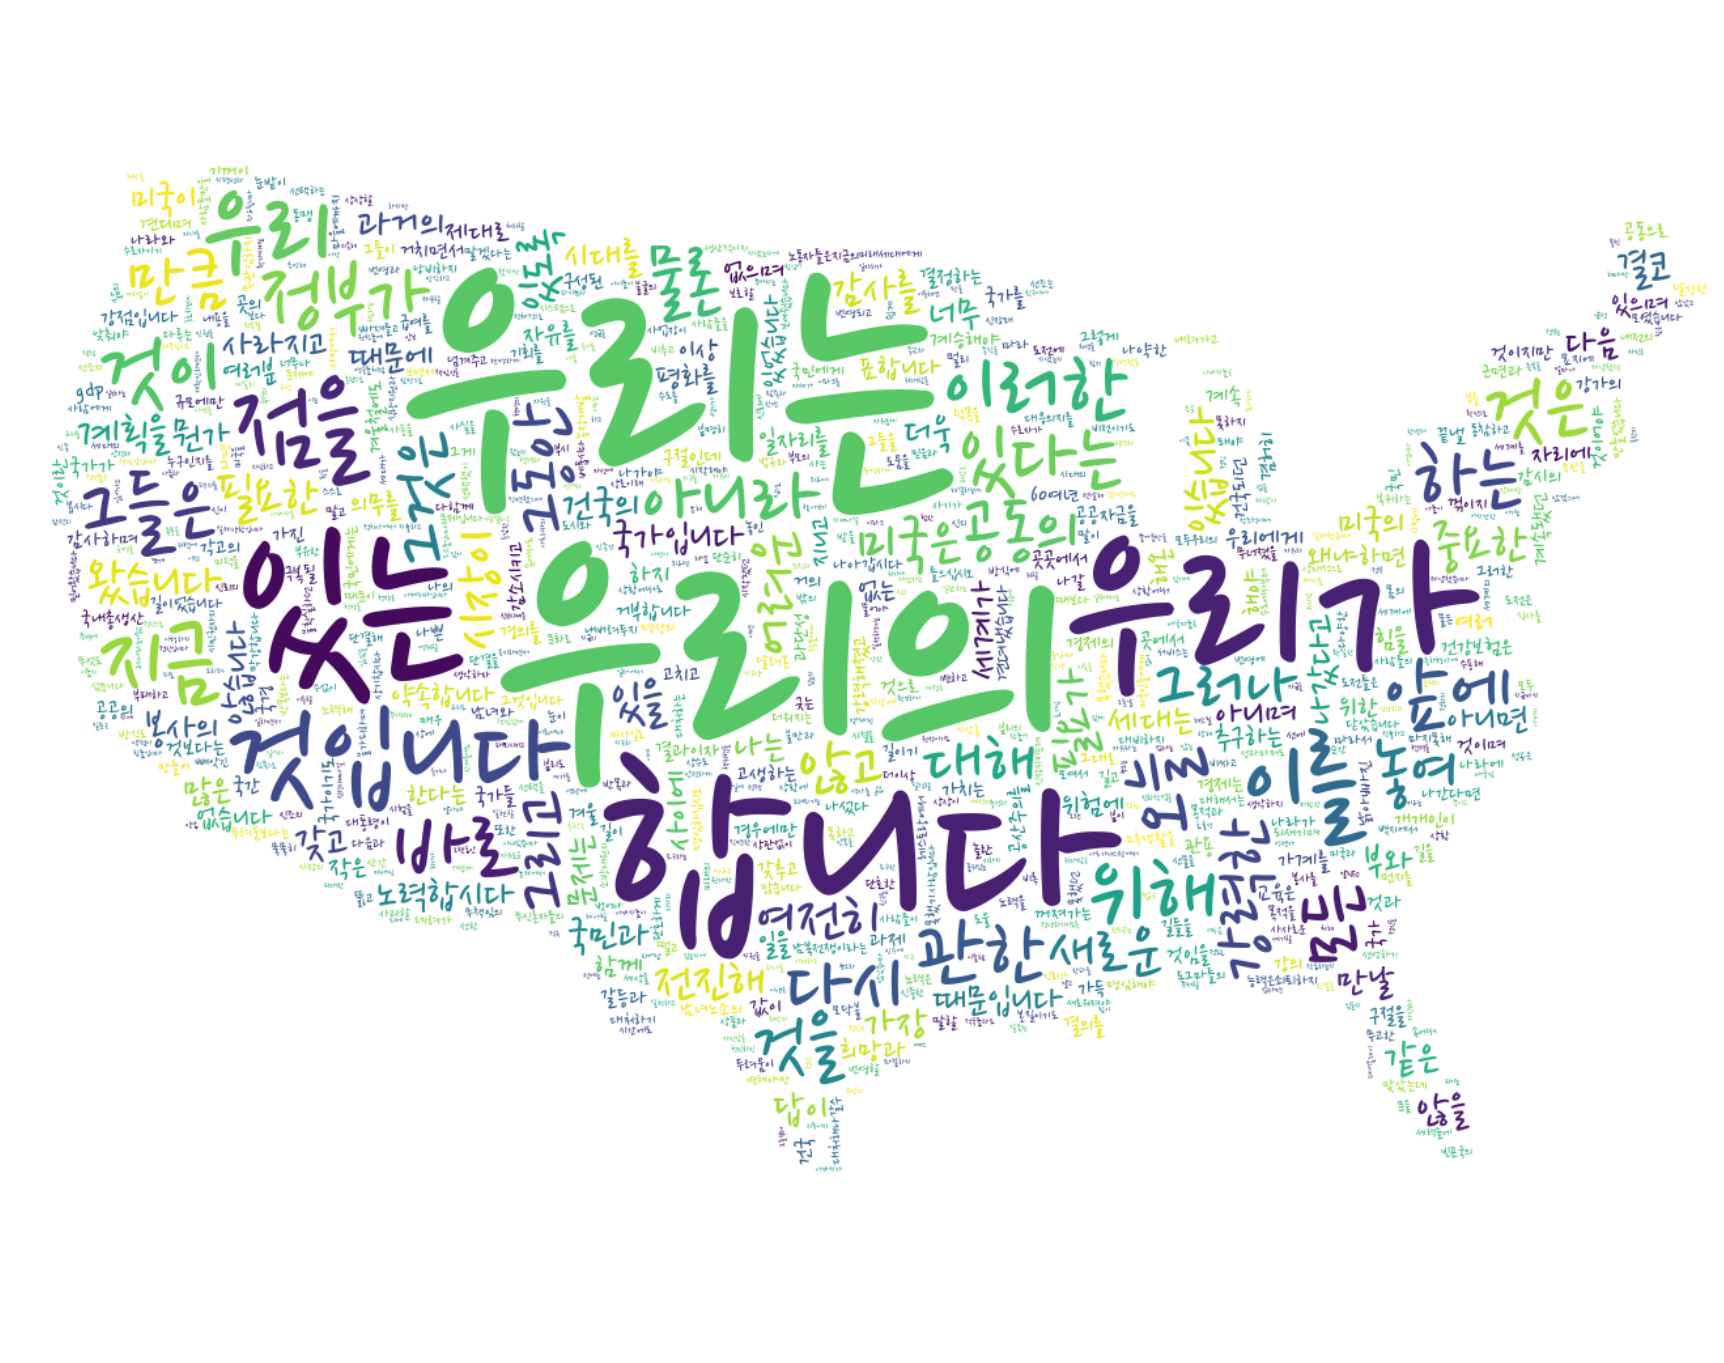

In [19]:
# 연설문
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("ObamaSpeech.png")